Task 2: Develop Time Series Forecasting Models for All Datasets

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

tsla_data = pd.read_csv('../data/TSLA_data.csv', index_col='Date', parse_dates=True)
spy_data = pd.read_csv('../data/SPY_data.csv', index_col='Date', parse_dates=True)
bnd_data = pd.read_csv('../data/BND_data.csv', index_col='Date', parse_dates=True)


In [17]:
def preprocess_data(df):
    df = df[['Close']].copy()
    df.dropna(inplace=True)
    return df

tsla_data = preprocess_data(tsla_data)
spy_data = preprocess_data(spy_data)
bnd_data = preprocess_data(bnd_data)

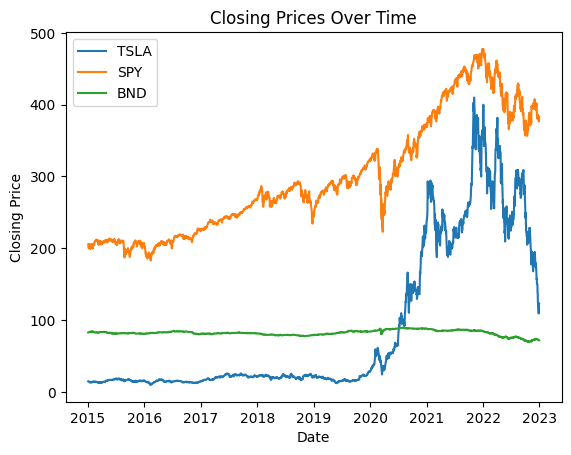

In [18]:
def plot_closing_prices(*dfs, labels):
    for df, label in zip(dfs, labels):
        plt.plot(df.index, df['Close'], label=label)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Closing Prices Over Time')
    plt.show()

plot_closing_prices(tsla_data, spy_data, bnd_data, labels=['TSLA', 'SPY', 'BND'])


### Train ARIMA/SARIMA Models

TSLA

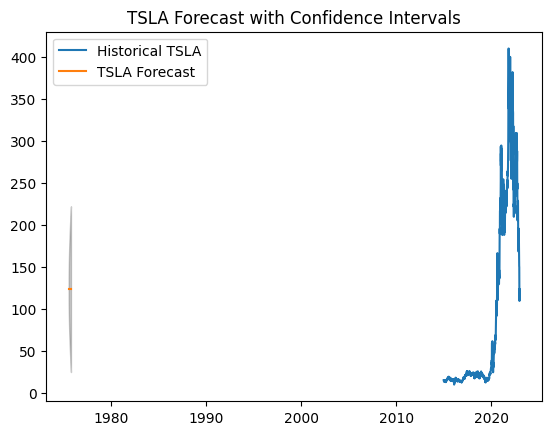

In [19]:
tsla_arima = ARIMA(tsla_data['Close'], order=(0, 1, 1)).fit()
tsla_forecast = tsla_arima.get_forecast(steps=90)  
tsla_ci = tsla_forecast.conf_int()

plt.plot(tsla_data.index, tsla_data['Close'], label='Historical TSLA')
plt.plot(tsla_forecast.predicted_mean.index, tsla_forecast.predicted_mean, label='TSLA Forecast')
plt.fill_between(tsla_ci.index, tsla_ci.iloc[:, 0], tsla_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title('TSLA Forecast with Confidence Intervals')
plt.show()


For BND

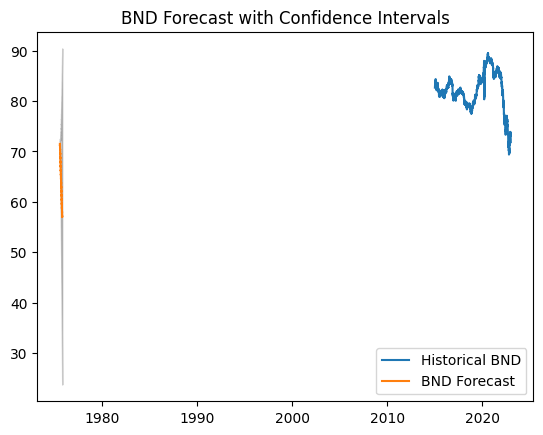

In [20]:
bnd_sarima = SARIMAX(bnd_data['Close'], order=(0, 1, 0), seasonal_order=(2, 1, 0, 5)).fit()
bnd_forecast = bnd_sarima.get_forecast(steps=90)
bnd_ci = bnd_forecast.conf_int()

plt.plot(bnd_data.index, bnd_data['Close'], label='Historical BND')
plt.plot(bnd_forecast.predicted_mean.index, bnd_forecast.predicted_mean, label='BND Forecast')
plt.fill_between(bnd_ci.index, bnd_ci.iloc[:, 0], bnd_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title('BND Forecast with Confidence Intervals')
plt.show()


For SPY

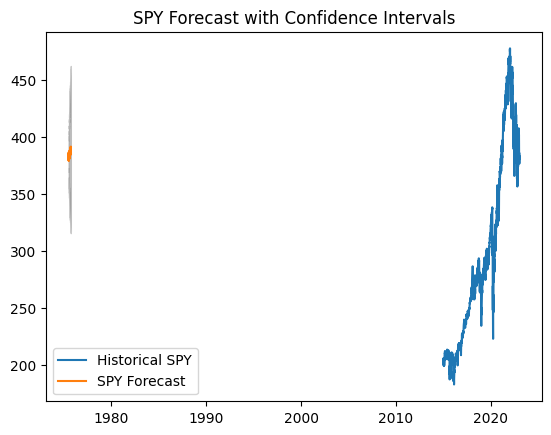

In [21]:
spy_sarima = SARIMAX(spy_data['Close'], order=(3, 1, 1), seasonal_order=(2, 1, 0, 5)).fit()
spy_forecast = spy_sarima.get_forecast(steps=90)
spy_ci = spy_forecast.conf_int()

plt.plot(spy_data.index, spy_data['Close'], label='Historical SPY')
plt.plot(spy_forecast.predicted_mean.index, spy_forecast.predicted_mean, label='SPY Forecast')
plt.fill_between(spy_ci.index, spy_ci.iloc[:, 0], spy_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title('SPY Forecast with Confidence Intervals')
plt.show()
